pygame 2.6.1 (SDL 2.28.4, Python 3.13.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
- Click and drag to draw
- Press ENTER when finished
- Press SPACE to clear


C:\Users\anton\AppData\Local\Temp\ipykernel_63168\3580745472.py:468: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


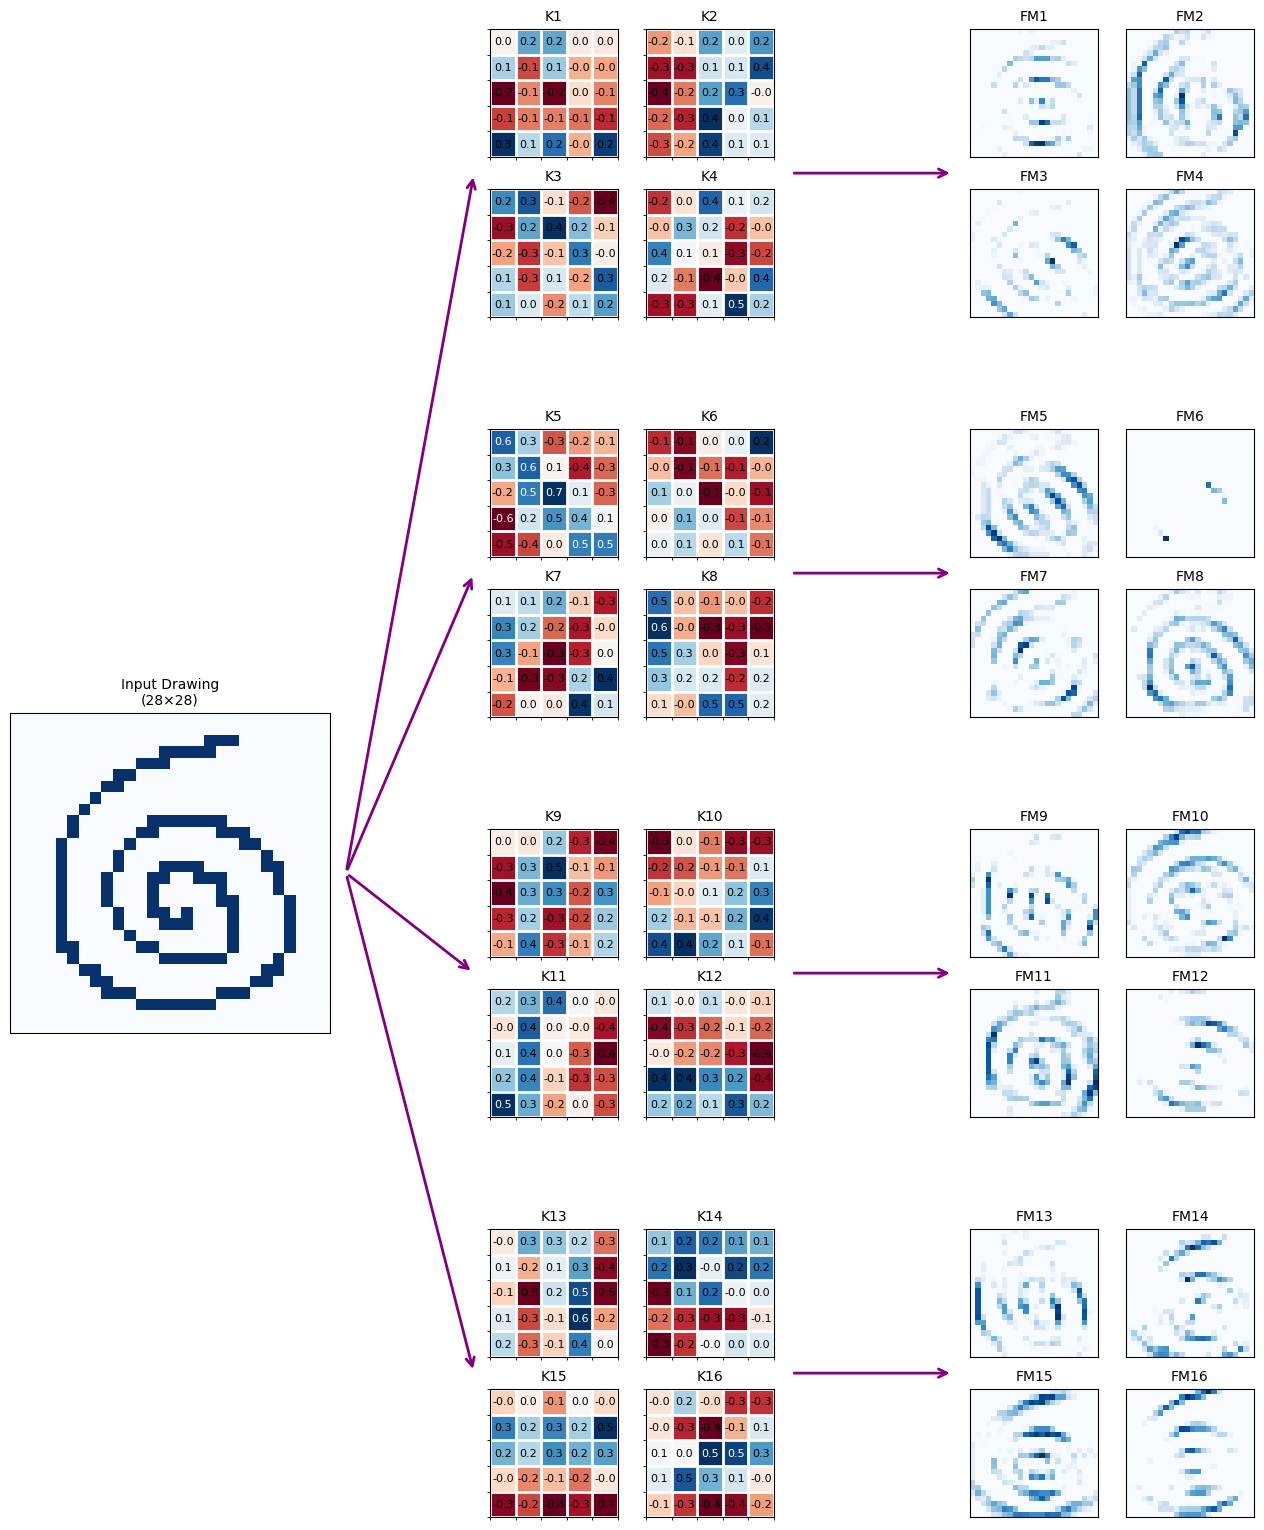

In [1]:
import pygame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as patches

def draw_digit():
    WIDTH, HEIGHT = 560, 560
    BG_COLOR = (255, 255, 255)
    
    running = True
    grid_array = []
    
    pygame.init()
    window = pygame.display.set_mode((WIDTH, HEIGHT))
    pygame.display.set_caption("Draw Digit - Press ENTER when done")
    window.fill(BG_COLOR)
    
    def draw_grid():
        block_size = int(WIDTH/28)
        
        for i in range(28):
            for j in range(28):
                grid_block = pygame.Rect(i * block_size, j * block_size, block_size, block_size)
                color = (255, 255, 255)
                grid_array.append((grid_block, color))
    
    def draw_rectangles():
        for rect, color in grid_array:
            pygame.draw.rect(window, color, rect)
            # Draw grid lines, better visibility
            pygame.draw.rect(window, (200, 200, 200), rect, 1)
    
    def get_digit_array():
        # Convert the current drawing to a 28x28 numpy array
        digit = np.zeros((28, 28))
        
        for row in range(28):
            for col in range(28):
                # Fixing the coordinate mapping: grid was created as [col][row]
                index = col * 28 + row
                rect, color = grid_array[index]
                
                if color == (0, 0, 0):  # Black pixels
                    digit[row, col] = 0.9
        
        return digit
    
    def clear_grid():
        # Clear the drawing
        for i in range(len(grid_array)):
            rect, _ = grid_array[i]
            grid_array[i] = (rect, (255, 255, 255))
    
    draw_grid()
    
    print("- Click and drag to draw")
    print("- Press ENTER when finished")
    print("- Press SPACE to clear")
    
    digit_array = None
    clock = pygame.time.Clock()
    
    while running:
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                running = False
                
            if event.type == pygame.KEYDOWN:
                if event.key == pygame.K_RETURN:
                    digit_array = get_digit_array()
                    running = False
                    
                elif event.key == pygame.K_SPACE:
                    clear_grid()
        
        if pygame.mouse.get_pressed()[0]:
            mouse_pos = pygame.mouse.get_pos()
            for index, (rect, color) in enumerate(grid_array):
                if rect.collidepoint(mouse_pos):
                    grid_array[index] = (rect, (0, 0, 0))
        
        # Draw everything
        window.fill(BG_COLOR)
        draw_rectangles()
        pygame.display.flip()
        clock.tick(60)
    
    pygame.quit()
    return digit_array

class CNNVisualizer:
    def __init__(self, input_size=(28, 28), filter_size=(5, 5), num_filters=16):
        self.input_size = input_size
        self.filter_size = filter_size
        self.num_filters = num_filters
        self.output_size = (
            input_size[0] - filter_size[0] + 1,
            input_size[1] - filter_size[1] + 1
        )
        
        self.input_data = draw_digit()
        self.filter_bias = np.array([
            -0.239532, -0.072666, -0.314909, -0.080079,
            -0.389541, -0.328099, -0.207792, -0.395359,
            -0.297987, -0.252624, -0.270118, -0.361449,
            -0.312527, -0.246792, -0.169581, -0.321820
        ])
        self.filters = [
            
            # Filter 1
            np.array([
                [ 0.034361,  0.155623,  0.155404,  0.024031,  0.021075],
                [ 0.113252, -0.103069,  0.121010, -0.036676, -0.044628],
                [-0.177898, -0.063570, -0.173520,  0.003580, -0.067112],
                [-0.108495, -0.072979, -0.068658, -0.075095, -0.121726],
                [ 0.261523,  0.102344,  0.208250, -0.036057,  0.248987]
            ]),
            
            # Filter 2
            np.array([
                [-0.164493, -0.052078,  0.221191,  0.048543,  0.237214],
                [-0.325108, -0.327648,  0.088302,  0.073561,  0.358889],
                [-0.390266, -0.197874,  0.221417,  0.307766, -0.008510],
                [-0.219068, -0.299751,  0.404388,  0.030677,  0.116388],
                [-0.251845, -0.150579,  0.378763,  0.061342,  0.057149]
            ]),
            
            # Filter 3
            np.array([
            [ 0.226063,  0.304590, -0.068229, -0.239610, -0.382903],
            [-0.330220,  0.187886,  0.364535,  0.152686, -0.099211],
            [-0.160093, -0.278723, -0.114885,  0.254945, -0.029979],
            [ 0.103608, -0.267326,  0.052802, -0.159418,  0.301716],
            [ 0.129132,  0.046037, -0.183536,  0.084744,  0.195730]
            ]),

            # Filter 4
            np.array([
                [-0.235487,  0.027779,  0.445910,  0.117232,  0.172051],
                [-0.042242,  0.294520,  0.175279, -0.239800, -0.041845],
                [ 0.390903,  0.093039,  0.050455, -0.311016, -0.209348],
                [ 0.153696, -0.142813, -0.359839, -0.027814,  0.438758],
                [-0.288537, -0.279088,  0.139171,  0.536328,  0.232867]
            ]),

            # Filter 5
            np.array([
                [ 0.598541,  0.291771, -0.324483, -0.200284, -0.137526],
                [ 0.336646,  0.594149,  0.051801, -0.435893, -0.292972],
                [-0.175570,  0.519181,  0.714222,  0.143931, -0.300636],
                [-0.566797,  0.198878,  0.450326,  0.373537,  0.089364],
                [-0.477121, -0.354287,  0.022131,  0.509213,  0.521843]
            ]),

            # Filter 6
            np.array([
                [-0.105250, -0.133675,  0.014314,  0.038614,  0.198177],
                [-0.028788, -0.139729, -0.070405, -0.110954, -0.034230],
                [ 0.084112,  0.036687, -0.148817, -0.010178, -0.124065],
                [ 0.016131,  0.101289,  0.046608, -0.090744, -0.056823],
                [ 0.036691,  0.073399,  0.001397,  0.069750, -0.068765]
            ]),

            # Filter 7
            np.array([
                [ 0.096189,  0.141901,  0.233445, -0.052485, -0.266369],
                [ 0.296569,  0.178962, -0.182905, -0.271630, -0.035664],
                [ 0.303031, -0.115183, -0.347676, -0.261664,  0.031994],
                [-0.094394, -0.334520, -0.312685,  0.167682,  0.433148],
                [-0.202212,  0.027577,  0.004936,  0.424872,  0.113835]
            ]),

            # Filter 8
            np.array([
                [ 0.482118, -0.011729, -0.076859, -0.019033, -0.213682],
                [ 0.593986, -0.044601, -0.335339, -0.268026, -0.329367],
                [ 0.464048,  0.287098,  0.028334, -0.305840,  0.065351],
                [ 0.307783,  0.209158,  0.196530, -0.216150,  0.189215],
                [ 0.050310, -0.012032,  0.493170,  0.499812,  0.178159]
            ]),

            # Filter 9
            np.array([
                [ 0.022207,  0.008461,  0.215623, -0.276479, -0.361644],
                [-0.309447,  0.250616,  0.484950, -0.077687, -0.133653],
                [-0.376902,  0.267726,  0.321378, -0.212572,  0.312336],
                [-0.273899,  0.201945, -0.311675, -0.231771,  0.212747],
                [-0.114191,  0.353332, -0.257306, -0.104889,  0.185157]
            ]),

            # Filter 10
            np.array([
                [-0.307513,  0.006132, -0.133066, -0.267815, -0.258981],
                [-0.204808, -0.174808, -0.099887, -0.139412,  0.099499],
                [-0.093891, -0.027894,  0.092913,  0.196585,  0.295982],
                [ 0.177795, -0.066545, -0.051155,  0.225716,  0.400448],
                [ 0.369491,  0.412878,  0.239564,  0.114213, -0.146664]
            ]),

            # Filter 11
            np.array([
                [ 0.177425,  0.268482,  0.407933,  0.039001, -0.017302],
                [-0.027973,  0.442634,  0.017986, -0.010518, -0.361805],
                [ 0.086586,  0.398214,  0.041617, -0.255886, -0.448530],
                [ 0.236947,  0.362642, -0.072589, -0.314105, -0.274692],
                [ 0.527694,  0.279910, -0.152621,  0.018700, -0.274901]
            ]),

            # Filter 12
            np.array([
                [ 0.090388, -0.010179,  0.103306, -0.039848, -0.083538],
                [-0.359861, -0.283518, -0.219068, -0.066723, -0.224030],
                [-0.030598, -0.161026, -0.182522, -0.308877, -0.389178],
                [ 0.403287,  0.405051,  0.265382,  0.237208, -0.351423],
                [ 0.159551,  0.203856,  0.115661,  0.349146,  0.184584]
            ]),

            # Filter 13
            np.array([
                [-0.011786,  0.313637,  0.251639,  0.189341, -0.256456],
                [ 0.068593, -0.155033,  0.104754,  0.332399, -0.449500],
                [-0.081307, -0.499630,  0.160275,  0.524438, -0.480259],
                [ 0.111363, -0.314406, -0.053967,  0.585696, -0.178033],
                [ 0.189987, -0.264355, -0.080847,  0.418051,  0.035949]
            ]),

            # Filter 14
            np.array([
                [ 0.085184,  0.207735,  0.177061,  0.128295,  0.109057],
                [ 0.190007,  0.264415, -0.003902,  0.236497,  0.183821],
                [-0.324101,  0.111900,  0.197018, -0.016800,  0.001897],
                [-0.195271, -0.254089, -0.287485, -0.293427, -0.067098],
                [-0.330049, -0.248553, -0.032681,  0.025036,  0.010600]
            ]),

            # Filter 15
            np.array([
                [-0.046910,  0.020938, -0.138568,  0.046199, -0.035325],
                [ 0.326205,  0.184626,  0.315675,  0.184064,  0.455892],
                [ 0.236866,  0.161586,  0.295411,  0.240804,  0.265910],
                [-0.038998, -0.154089, -0.084542, -0.178805, -0.002895],
                [-0.334915, -0.230596, -0.366511, -0.298806, -0.369044]
            ]),

            # Filter 16
            np.array([
                [-0.020607,  0.206660, -0.047611, -0.318499, -0.310762],
                [-0.023440, -0.330900, -0.447586, -0.127754,  0.120847],
                [ 0.052603,  0.047112,  0.539292,  0.501998,  0.325047],
                [ 0.096856,  0.469737,  0.280054,  0.141934, -0.003951],
                [-0.072420, -0.305021, -0.442866, -0.404888, -0.159460]
            ])

        ][:num_filters]
        
        # Generate feature maps
        self.output_maps = self.apply_convolution()
    
    def apply_convolution(self):
        output_maps = []
        
        for f in range(self.num_filters):
            output_map = np.zeros(self.output_size)
            
            for i in range(self.output_size[0]):
                for j in range(self.output_size[1]):
                    # Extract the patch from input
                    patch = self.input_data[i:i+self.filter_size[0], j:j+self.filter_size[1]]
                    
                    # Apply filter
                    output_map[i, j] = np.sum(patch * self.filters[f])

                    # Apply bias & ReLU
                    output_map[i, j] = max(0, output_map[i, j] + self.filter_bias[f])
            
            output_maps.append(output_map)
        
        return output_maps
    
    def visualize_full_matrices(self, show_numbers_on_filters=True, decimals=1):
        """
        show_numbers_on_filters : Whether to display numerical values on filter cells
        decimals : Number of decimal places to display for floating point values
        
        """
        # Set up the figure with grid layout
        fig = plt.figure(figsize=(16, 20))
        
        # Function to display matrix
        def plot_matrix(ax, matrix, title, cmap='Blues', value_format='.1f', show_grid=True, show_numbers=False):
            # Show the matrix as an image
            im = ax.imshow(matrix, cmap=cmap, interpolation='nearest')
            
            # Set title
            ax.set_title(title, fontsize=10)
            
            # Configure ticks and grid based on matrix size
            if show_grid and matrix.shape[0] <= 10 and matrix.shape[1] <= 10:
                # For small matrices, show grid lines
                ax.set_xticks(np.arange(-.5, matrix.shape[1], 1), minor=True)
                ax.set_yticks(np.arange(-.5, matrix.shape[0], 1), minor=True)
                ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
                ax.set_xticks([])
                ax.set_yticks([])
            else:
                # For large matrices just turn off ticks
                ax.set_xticks([])
                ax.set_yticks([])
            
            # Add numbers only for small matrices or if explicitly requested
            if show_numbers and matrix.shape[0] <= 10 and matrix.shape[1] <= 10:
                fontsize = 8 if matrix.shape[0] <= 5 else 6
                
                for i in range(matrix.shape[0]):
                    for j in range(matrix.shape[1]):
                        value = matrix[i, j]
                        # Choose text color based on background
                        text_color = 'white' if abs(value) > 0.5 else 'black'
                        # Format the value based on data type
                        if isinstance(value, (int, np.integer)):
                            value_str = f"{value}"
                        else:
                            value_str = f"{value:{value_format}}"
                        ax.text(j, i, value_str, ha='center', va='center', 
                               color=text_color, fontsize=fontsize)
                        
            return ax
        
        # Plot the input data (left column, centered)
        # Manual positioning for input
        input_left = 0.05
        input_bottom = 0.4
        input_width = 0.2
        input_height = 0.2
        ax_input = fig.add_axes([input_left, input_bottom, input_width, input_height])
        plot_matrix(ax_input, self.input_data, 'Input Drawing\n(28×28)', show_numbers=False)
        
        
        # Store axes for arrows
        kernel_block_axes = []  # List of (block_num, axes_list)
        output_block_axes = []  # List of (block_num, axes_list)
        
        # Plot all kernels and feature maps in 4 vertical 2x2 blocks
        for block_num in range(4):
            block_kernel_axes = []
            block_output_axes = []
            
            # Calculate block position (vertical stacking)
            block_top = 0.85 - (block_num * 0.2)  # Each block takes 0.2 height, spaced vertically
            
            # Create 2x2 grid for this block
            for sub_row in range(2):
                for sub_col in range(2):
                    # Calculate filter index
                    f = block_num * 4 + sub_row * 2 + sub_col
                    
                    # Calculate positions for 2x2 blocks
                    kernel_base_left = 0.35
                    feature_base_left = 0.65
                    
                    # Size of each small matrix
                    sub_width = 0.08
                    sub_height = 0.08
                    
                    # Tighter spacing within 2x2 blocks to make them look more square-like
                    h_spacing = 0.0175  # Horizontal gap between matrices in same block
                    v_spacing = 0.0001  # Even smaller vertical gap between matrices in same block
                    
                    # Position within 2x2 block
                    left_kernel = kernel_base_left + sub_col * (sub_width + h_spacing)
                    left_feature = feature_base_left + sub_col * (sub_width + h_spacing)
                    bottom = block_top - sub_row * (sub_height + v_spacing)
                    
                    # Plot kernel
                    ax_filter = fig.add_axes([left_kernel, bottom, sub_width, sub_height])
                    plot_matrix(ax_filter, self.filters[f], f'K{f+1}', cmap='RdBu', show_numbers=show_numbers_on_filters)
                    block_kernel_axes.append(ax_filter)
                    
                    # Plot corresponding feature map
                    ax_output = fig.add_axes([left_feature, bottom, sub_width, sub_height])
                    plot_matrix(ax_output, self.output_maps[f], f'FM{f+1}', show_numbers=False)
                    block_output_axes.append(ax_output)
            
            kernel_block_axes.append((block_num, block_kernel_axes))
            output_block_axes.append((block_num, block_output_axes))
        
        # Draw arrows using figure coordinates
        fig.canvas.draw()  # This is needed to establish the correct coordinates
        
        # Get input position in figure coordinates
        input_bbox = ax_input.get_position()
        input_right = input_bbox.x1
        input_center_y = (input_bbox.y0 + input_bbox.y1) / 2
        
        # Function to add straight arrow
        def add_straight_arrow(fig, start_x, start_y, end_x, end_y, color='purple', width=2.0):
            arrow = patches.FancyArrowPatch(
                (start_x, start_y), (end_x, end_y),
                arrowstyle='->', color=color, linewidth=width,
                connectionstyle='arc3,rad=0',  # Straight line
                shrinkA=3, shrinkB=3,  # Shrink from both ends
                mutation_scale=15,  # Controls arrow head size
                transform=fig.transFigure, zorder=0
            )
            fig.add_artist(arrow)
        
        # Add arrows from input to each 2x2 kernel block
        for block_num, block_axes in kernel_block_axes:
            if block_axes:
                # Calculate the bounding box of the entire 2x2 kernel block
                all_positions = []
                for ax in block_axes:
                    bbox = ax.get_position()
                    all_positions.extend([
                        (bbox.x0, bbox.y0),  # bottom-left
                        (bbox.x1, bbox.y1)   # top-right
                    ])
                
                if all_positions:
                    # Find the leftmost edge of the block with padding
                    block_left = min(pos[0] for pos in all_positions) - 0.01  # Start arrow a bit before block
                    # Find vertical center of the block
                    block_top = max(pos[1] for pos in all_positions)
                    block_bottom = min(pos[1] for pos in all_positions)
                    block_center_y = (block_top + block_bottom) / 2
                    
                    # Arrow from input to left edge of kernel block
                    add_straight_arrow(fig, input_right + 0.01, input_center_y, block_left, block_center_y, color='purple')
        
        # Add arrows from each 2x2 kernel block to corresponding 2x2 feature map block
        for (k_block_num, k_axes), (o_block_num, o_axes) in zip(kernel_block_axes, output_block_axes):
            if k_axes and o_axes and k_block_num == o_block_num:
                # Calculate bounding box of kernel block
                k_positions = []
                for ax in k_axes:
                    bbox = ax.get_position()
                    k_positions.extend([
                        (bbox.x0, bbox.y0),  # bottom-left
                        (bbox.x1, bbox.y1)   # top-right
                    ])
                
                # Calculate bounding box of output block
                o_positions = []
                for ax in o_axes:
                    bbox = ax.get_position()
                    o_positions.extend([
                        (bbox.x0, bbox.y0),  # bottom-left
                        (bbox.x1, bbox.y1)   # top-right
                    ])
                
                if k_positions and o_positions:
                    # Find rightmost edge of kernel block with padding
                    k_right = max(pos[0] for pos in k_positions) + 0.01  # End arrow a bit after block
                    k_top = max(pos[1] for pos in k_positions)
                    k_bottom = min(pos[1] for pos in k_positions)
                    k_center_y = (k_top + k_bottom) / 2
                    
                    # Find leftmost edge of output block with padding
                    o_left = min(pos[0] for pos in o_positions) - 0.01  # Start arrow a bit before block
                    o_top = max(pos[1] for pos in o_positions)
                    o_bottom = min(pos[1] for pos in o_positions)
                    o_center_y = (o_top + o_bottom) / 2
                    
                    # Arrow from right edge of kernel block to left edge of feature map block
                    add_straight_arrow(fig, k_right, k_center_y, o_left, o_center_y, color='purple')
        
        plt.tight_layout()
        plt.show()

visualizer = CNNVisualizer()
visualizer.visualize_full_matrices()